In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Setting display options for Pandas and Matplotlib
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style for better looking plots

In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/dummy_fault_RackA2_Module01_200rows.csv")
print(df['Hazard_Label'].value_counts())

# Show actual rows with label == 1
hazard_df = df[df['Hazard_Label'] == 1]
print(hazard_df[['Timestamp', 'Module_ID']].drop_duplicates())

# Optional: Check if the expected time range is covered
hazard_df['Timestamp'] = pd.to_datetime(hazard_df['Timestamp'])
print(hazard_df.sort_values('Timestamp').head())


Hazard_Label
0    138040
1       200
Name: count, dtype: int64
                 Timestamp        Module_ID
17640  2024-01-01 01:00:00  RackA2_Module01
17641  2024-01-01 01:00:10  RackA2_Module01
17642  2024-01-01 01:00:20  RackA2_Module01
17643  2024-01-01 01:00:30  RackA2_Module01
17644  2024-01-01 01:00:40  RackA2_Module01
...                    ...              ...
17835  2024-01-01 01:32:30  RackA2_Module01
17836  2024-01-01 01:32:40  RackA2_Module01
17837  2024-01-01 01:32:50  RackA2_Module01
17838  2024-01-01 01:33:00  RackA2_Module01
17839  2024-01-01 01:33:10  RackA2_Module01

[200 rows x 2 columns]
                Timestamp        Module_ID Rack_ID  Module_Avg_Surface_Temp_C  Module_Max_Surface_Temp_C  Module_Voltage_V  Module_Current_A  Module_SoC_percent  Sim_OffGas_CO_ppm_proxy  Sim_OffGas_H2_ppm_proxy  Sim_OffGas_VOC_ppm_proxy  Ambient_Temp_Rack_C  Hazard_Label
17640 2024-01-01 01:00:00  RackA2_Module01  RackA2                  37.589916                  40.061732         

C:\Users\ranji\AppData\Local\Temp\ipykernel_3368\2850832976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hazard_df['Timestamp'] = pd.to_datetime(hazard_df['Timestamp'])


In [4]:
# --- Configuration ---
# Defining the path to our data file.

# DATA_FILE_NAME = "internalfault_aggressive_racka2_module01_isc_aggr_run1.csv"
# DATA_PATH = os.path.join("..", "data", "raw", DATA_FILE_NAME)

# DATA_FILE_NAME = "internalfault_very_aggressive_racka2_module01_isc_very_aggr_run1.csv"
# DATA_PATH = os.path.join("..", "data", "raw", DATA_FILE_NAME)

# In your EDA Notebook - Step 1
DATA_FILE_NAME = "dummy_fault_RackA2_Module01_200rows.csv"
DATA_PATH = os.path.join("..", "data", "raw", DATA_FILE_NAME)

In [5]:
# The ID of the module that is expected to fail in this scenario (from simulator.py)
# This helps us focus our analysis.
FAILING_MODULE_ID = "RackA2_Module01" # As defined in Scenario 4 in simulator.py

In [6]:
# --- Load the Dataset ---
print(f"Loading data from: {DATA_PATH}")
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print("Data loaded successfully.")
else:
    print(f"ERROR: Data file not found at {DATA_PATH}")
    print("Please ensure you have run simulator.py and the file exists, or update DATA_FILE_NAME.")
    # In a real script, you might exit here or raise an error
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors in the script

if not df.empty:
    print(f"\nDataset shape: {df.shape}")

Loading data from: ..\data\raw\dummy_fault_RackA2_Module01_200rows.csv
Data loaded successfully.

Dataset shape: (138240, 13)


**Explanation:**

- We import pandas for data handling, numpy for numerical work, matplotlib.pyplot and seaborn for plotting, and os for path manipulation.

- We set DATA_FILE_NAME to the specific CSV we want to analyze. Make sure this matches a file you generated.

- FAILING_MODULE_ID is important because our scenarios usually involve one specific module failing. We'll want to isolate its data.

- We load the CSV into a pandas DataFrame called df.

- Basic checks for file existence and dataset shape are performed.

---
**Initial Data Inspection**
- Let's get a first look at the data structure and summary statistics.

In [7]:
if not df.empty:
    print("\n--- First 5 rows of the dataset: ---")
    print(df.head())


--- First 5 rows of the dataset: ---
             Timestamp        Module_ID Rack_ID  Module_Avg_Surface_Temp_C  Module_Max_Surface_Temp_C  Module_Voltage_V  Module_Current_A  Module_SoC_percent  Sim_OffGas_CO_ppm_proxy  Sim_OffGas_H2_ppm_proxy  Sim_OffGas_VOC_ppm_proxy  Ambient_Temp_Rack_C  Hazard_Label
0  2024-01-01 00:00:00  RackA1_Module01  RackA1                     23.136                     24.372            51.820            -0.021              81.943                    1.759                    0.988                     1.801               22.261             0
1  2024-01-01 00:00:10  RackA1_Module01  RackA1                     23.478                     24.719            51.998             0.012              82.295                    2.008                    1.936                     1.851               22.415             0
2  2024-01-01 00:00:20  RackA1_Module01  RackA1                     23.764                     25.286            52.056            -0.053              84.6

In [8]:
if not df.empty:
    print("\n--- Last 5 rows of the dataset: ---")
    print(df.tail())


--- Last 5 rows of the dataset: ---
                  Timestamp        Module_ID Rack_ID  Module_Avg_Surface_Temp_C  Module_Max_Surface_Temp_C  Module_Voltage_V  Module_Current_A  Module_SoC_percent  Sim_OffGas_CO_ppm_proxy  Sim_OffGas_H2_ppm_proxy  Sim_OffGas_VOC_ppm_proxy  Ambient_Temp_Rack_C  Hazard_Label
138235  2024-01-01 05:59:10  RackB4_Module08  RackB4                     27.778                     29.185            49.471             0.047              74.921                    1.784                    2.308                     2.778               21.125             0
138236  2024-01-01 05:59:20  RackB4_Module08  RackB4                     27.334                     28.722            49.033            -0.014              73.781                    2.167                    1.801                     2.336               21.103             0
138237  2024-01-01 05:59:30  RackB4_Module08  RackB4                     27.567                     28.540            49.391            -0.00

In [9]:
if not df.empty:
    print("\n--- Data types and non-null counts: ---")
    df.info()


--- Data types and non-null counts: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138240 entries, 0 to 138239
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Timestamp                  138240 non-null  object 
 1   Module_ID                  138240 non-null  object 
 2   Rack_ID                    138240 non-null  object 
 3   Module_Avg_Surface_Temp_C  138195 non-null  float64
 4   Module_Max_Surface_Temp_C  138173 non-null  float64
 5   Module_Voltage_V           138167 non-null  float64
 6   Module_Current_A           138162 non-null  float64
 7   Module_SoC_percent         138167 non-null  float64
 8   Sim_OffGas_CO_ppm_proxy    138168 non-null  float64
 9   Sim_OffGas_H2_ppm_proxy    138171 non-null  float64
 10  Sim_OffGas_VOC_ppm_proxy   138170 non-null  float64
 11  Ambient_Temp_Rack_C        138164 non-null  float64
 12  Hazard_Label               138240 non-null  i

In [10]:
if not df.empty:
    print("\n--- Summary statistics for numerical features: ---")
    # Convert Timestamp to datetime objects if it's not already (it should be by simulator)
    # df['Timestamp'] = pd.to_datetime(df['Timestamp']) # Already done by simulator if loaded from CSV
    # For describe(), exclude non-numerical if they cause issues, or select specific columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    print(df[numerical_cols].describe())


--- Summary statistics for numerical features: ---
       Module_Avg_Surface_Temp_C  Module_Max_Surface_Temp_C  Module_Voltage_V  Module_Current_A  Module_SoC_percent  Sim_OffGas_CO_ppm_proxy  Sim_OffGas_H2_ppm_proxy  Sim_OffGas_VOC_ppm_proxy  Ambient_Temp_Rack_C   Hazard_Label
count              138195.000000              138173.000000     138167.000000     138162.000000       138167.000000            138168.000000            138171.000000             138170.000000        138164.000000  138240.000000
mean                   26.102377                  27.104572         50.182577         -0.000005           77.455540                 2.365880                 2.373027                  2.456704            21.958659       0.001447
std                     1.906648                   1.971922          0.864534          0.050639            3.765368                10.446170                12.886427                 15.545309             0.603713       0.038009
min                    22.238000    

In [11]:
if not df.empty:
    print("\n--- Check for missing values (sum per column): ---")
    print(df.isnull().sum())


--- Check for missing values (sum per column): ---
Timestamp                     0
Module_ID                     0
Rack_ID                       0
Module_Avg_Surface_Temp_C    45
Module_Max_Surface_Temp_C    67
Module_Voltage_V             73
Module_Current_A             78
Module_SoC_percent           73
Sim_OffGas_CO_ppm_proxy      72
Sim_OffGas_H2_ppm_proxy      69
Sim_OffGas_VOC_ppm_proxy     70
Ambient_Temp_Rack_C          76
Hazard_Label                  0
dtype: int64


In [12]:
if not df.empty:
    print("\n--- Unique Module IDs present: ---")
    print(df['Module_ID'].unique())
    print(f"Total unique modules in this dataset: {df['Module_ID'].nunique()}")


--- Unique Module IDs present: ---
['RackA1_Module01' 'RackA1_Module02' 'RackA1_Module03' 'RackA1_Module04'
 'RackA1_Module05' 'RackA1_Module06' 'RackA1_Module07' 'RackA1_Module08'
 'RackA2_Module01' 'RackA2_Module02' 'RackA2_Module03' 'RackA2_Module04'
 'RackA2_Module05' 'RackA2_Module06' 'RackA2_Module07' 'RackA2_Module08'
 'RackA3_Module01' 'RackA3_Module02' 'RackA3_Module03' 'RackA3_Module04'
 'RackA3_Module05' 'RackA3_Module06' 'RackA3_Module07' 'RackA3_Module08'
 'RackA4_Module01' 'RackA4_Module02' 'RackA4_Module03' 'RackA4_Module04'
 'RackA4_Module05' 'RackA4_Module06' 'RackA4_Module07' 'RackA4_Module08'
 'RackB1_Module01' 'RackB1_Module02' 'RackB1_Module03' 'RackB1_Module04'
 'RackB1_Module05' 'RackB1_Module06' 'RackB1_Module07' 'RackB1_Module08'
 'RackB2_Module01' 'RackB2_Module02' 'RackB2_Module03' 'RackB2_Module04'
 'RackB2_Module05' 'RackB2_Module06' 'RackB2_Module07' 'RackB2_Module08'
 'RackB3_Module01' 'RackB3_Module02' 'RackB3_Module03' 'RackB3_Module04'
 'RackB3_Module

**Explanation:**

- df.head() and df.tail(): Show the first and last few rows, giving a quick feel for the data and column names.

- df.info(): Provides a concise summary: column names, data types (e.g., float64, object), number of non-null entries per column, and memory usage. This is excellent for spotting if 'Timestamp' was loaded as a string instead of a datetime object, or identifying columns with many missing values right away.

- df[numerical_cols].describe(): Calculates descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns. This helps understand the range and central tendency of each sensor reading.

- df.isnull().sum(): Counts the number of missing values (NaNs) in each column. Our simulator intentionally adds some, so we expect to see non-zero counts here.

- df['Module_ID'].unique(): Shows all the unique module identifiers present in this dataset. Since we're simulating a whole warehouse, there will be many.

**What to look for here:**

- Timestamp: Is it correctly parsed as a datetime object? (The simulator saves it in a way that pd.read_csv usually infers correctly).

- Data Types: Are sensor readings numerical (float or int)? Are categorical IDs like Module_ID objects/strings?

- Missing Values: Which columns have missing data? How much? This confirms our SENSOR_MISSING_RATE_PERCENT is working.

- Ranges in describe(): Do min/max values for temperatures, voltages, etc., make sense? Are there any obviously impossible values (though outliers might cause this)?

- Number of Modules: Does it match what you expect from the simulator's configuration (e.g., 64 modules for 2 rows of 4 racks with 8 modules each)?

---
**Analyzing the Target Variable (Hazard_Label)**
- Understanding the distribution of our target variable is crucial, especially for classification tasks.


--- Target Variable Distribution (Hazard_Label): ---
Absolute Counts:
 Hazard_Label
0    138040
1       200
Name: count, dtype: int64

Percentage:
 Hazard_Label
0    99.855324
1     0.144676
Name: proportion, dtype: float64


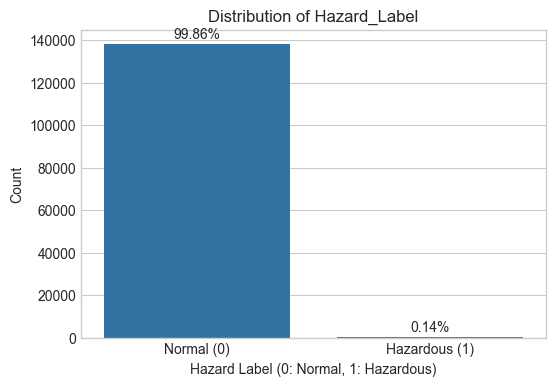

In [13]:
if not df.empty and 'Hazard_Label' in df.columns:
    print("\n--- Target Variable Distribution (Hazard_Label): ---")
    label_counts_abs = df['Hazard_Label'].value_counts()
    label_counts_pct = df['Hazard_Label'].value_counts(normalize=True) * 100
    print("Absolute Counts:\n", label_counts_abs)
    print("\nPercentage:\n", label_counts_pct)

    # Visualize it
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Hazard_Label', data=df)
    plt.title('Distribution of Hazard_Label')
    plt.xlabel('Hazard Label (0: Normal, 1: Hazardous)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Normal (0)', 'Hazardous (1)'])
    # Add percentages on top of bars
    # Ensure correct order for percentages if value_counts doesn't sort by index
    # For this simple 0/1 case, it's usually fine, but for more classes, be careful
    # A more robust way if not sorted by index:
    # for i, col_val in enumerate(label_counts_abs.index.sort_values()):
    #     count = label_counts_abs[col_val]
    #     percentage = f'{label_counts_pct[col_val]:.2f}%'
    #     plt.text(i, count + (0.01 * df.shape[0]), percentage, ha='center', va='bottom')
    # Simpler for 0,1 assuming order is 0 then 1 or using .sort_index()
    sorted_abs_counts = label_counts_abs.sort_index()
    sorted_pct_counts = label_counts_pct.sort_index()
    for i, count in enumerate(sorted_abs_counts):
        percentage = f'{sorted_pct_counts.iloc[i]:.2f}%'
        plt.text(i, count + (0.01 * df.shape[0]), percentage, ha='center', va='bottom')

    plt.show()
else:
    print("\n'Hazard_Label' column not found or DataFrame is empty.")

**Explanation:**

- df['Hazard_Label'].value_counts(normalize=True): Calculates the percentage of occurrences for each class (0 and 1).

- The sns.countplot visualizes this distribution.

**What to look for here:**

- Class Imbalance: We expect a significant imbalance. The "Hazardous" (1) state should be much rarer than the "Normal" (0) state, as failures are infrequent events and the hazardous window is short. This imbalance will need to be addressed during model training (e.g., using class weighting, over/undersampling techniques).

---
**Time-Series Visualization of Sensor Data**
- This is where EDA gets really insightful for time-series data. We'll plot sensor readings over time, focusing on the failing module and comparing it to a normal one.

#### A. Isolate Data for the Failing Module and a Sample Normal Module

In [14]:
if not df.empty:
    # Ensure Timestamp is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    df_failing_module = df[df['Module_ID'] == FAILING_MODULE_ID].copy() # Use .copy() to avoid SettingWithCopyWarning
    
    # Select a sample normal module (one that is NOT the failing module)
    # Ensure there are other modules to select from
    all_module_ids = df['Module_ID'].unique()
    sample_normal_module_id = None
    if len(all_module_ids) > 1:
        for mod_id in all_module_ids:
            if mod_id != FAILING_MODULE_ID:
                sample_normal_module_id = mod_id
                break # Found one
    
    df_normal_module = pd.DataFrame() # Initialize as empty
    if sample_normal_module_id:
        df_normal_module = df[df['Module_ID'] == sample_normal_module_id].copy()
        print(f"\nData isolated for failing module: {FAILING_MODULE_ID} (Shape: {df_failing_module.shape})")
        print(f"Data isolated for sample normal module: {sample_normal_module_id} (Shape: {df_normal_module.shape})")
    elif FAILING_MODULE_ID in all_module_ids and len(all_module_ids) == 1:
        df_failing_module = df[df['Module_ID'] == FAILING_MODULE_ID].copy() # Ensure it's a copy
        print(f"\nData isolated for failing module: {FAILING_MODULE_ID} (Shape: {df_failing_module.shape})")
        print("Only one module ID found in the dataset; cannot select a separate normal module for comparison from this file alone.")
    else:
        print(f"\nCould not isolate data for failing module '{FAILING_MODULE_ID}' or find a sample normal module.")
        df_failing_module = pd.DataFrame() # Ensure it's empty if not found



Data isolated for failing module: RackA2_Module01 (Shape: (2160, 13))
Data isolated for sample normal module: RackA1_Module01 (Shape: (2160, 13))


---
#### B. Plotting Key Sensor Data for the Failing Module

- Let's look at temperature, voltage, current, and our simulated gas proxies.


--- Plotting sensor data for Failing Module: RackA2_Module01 ---


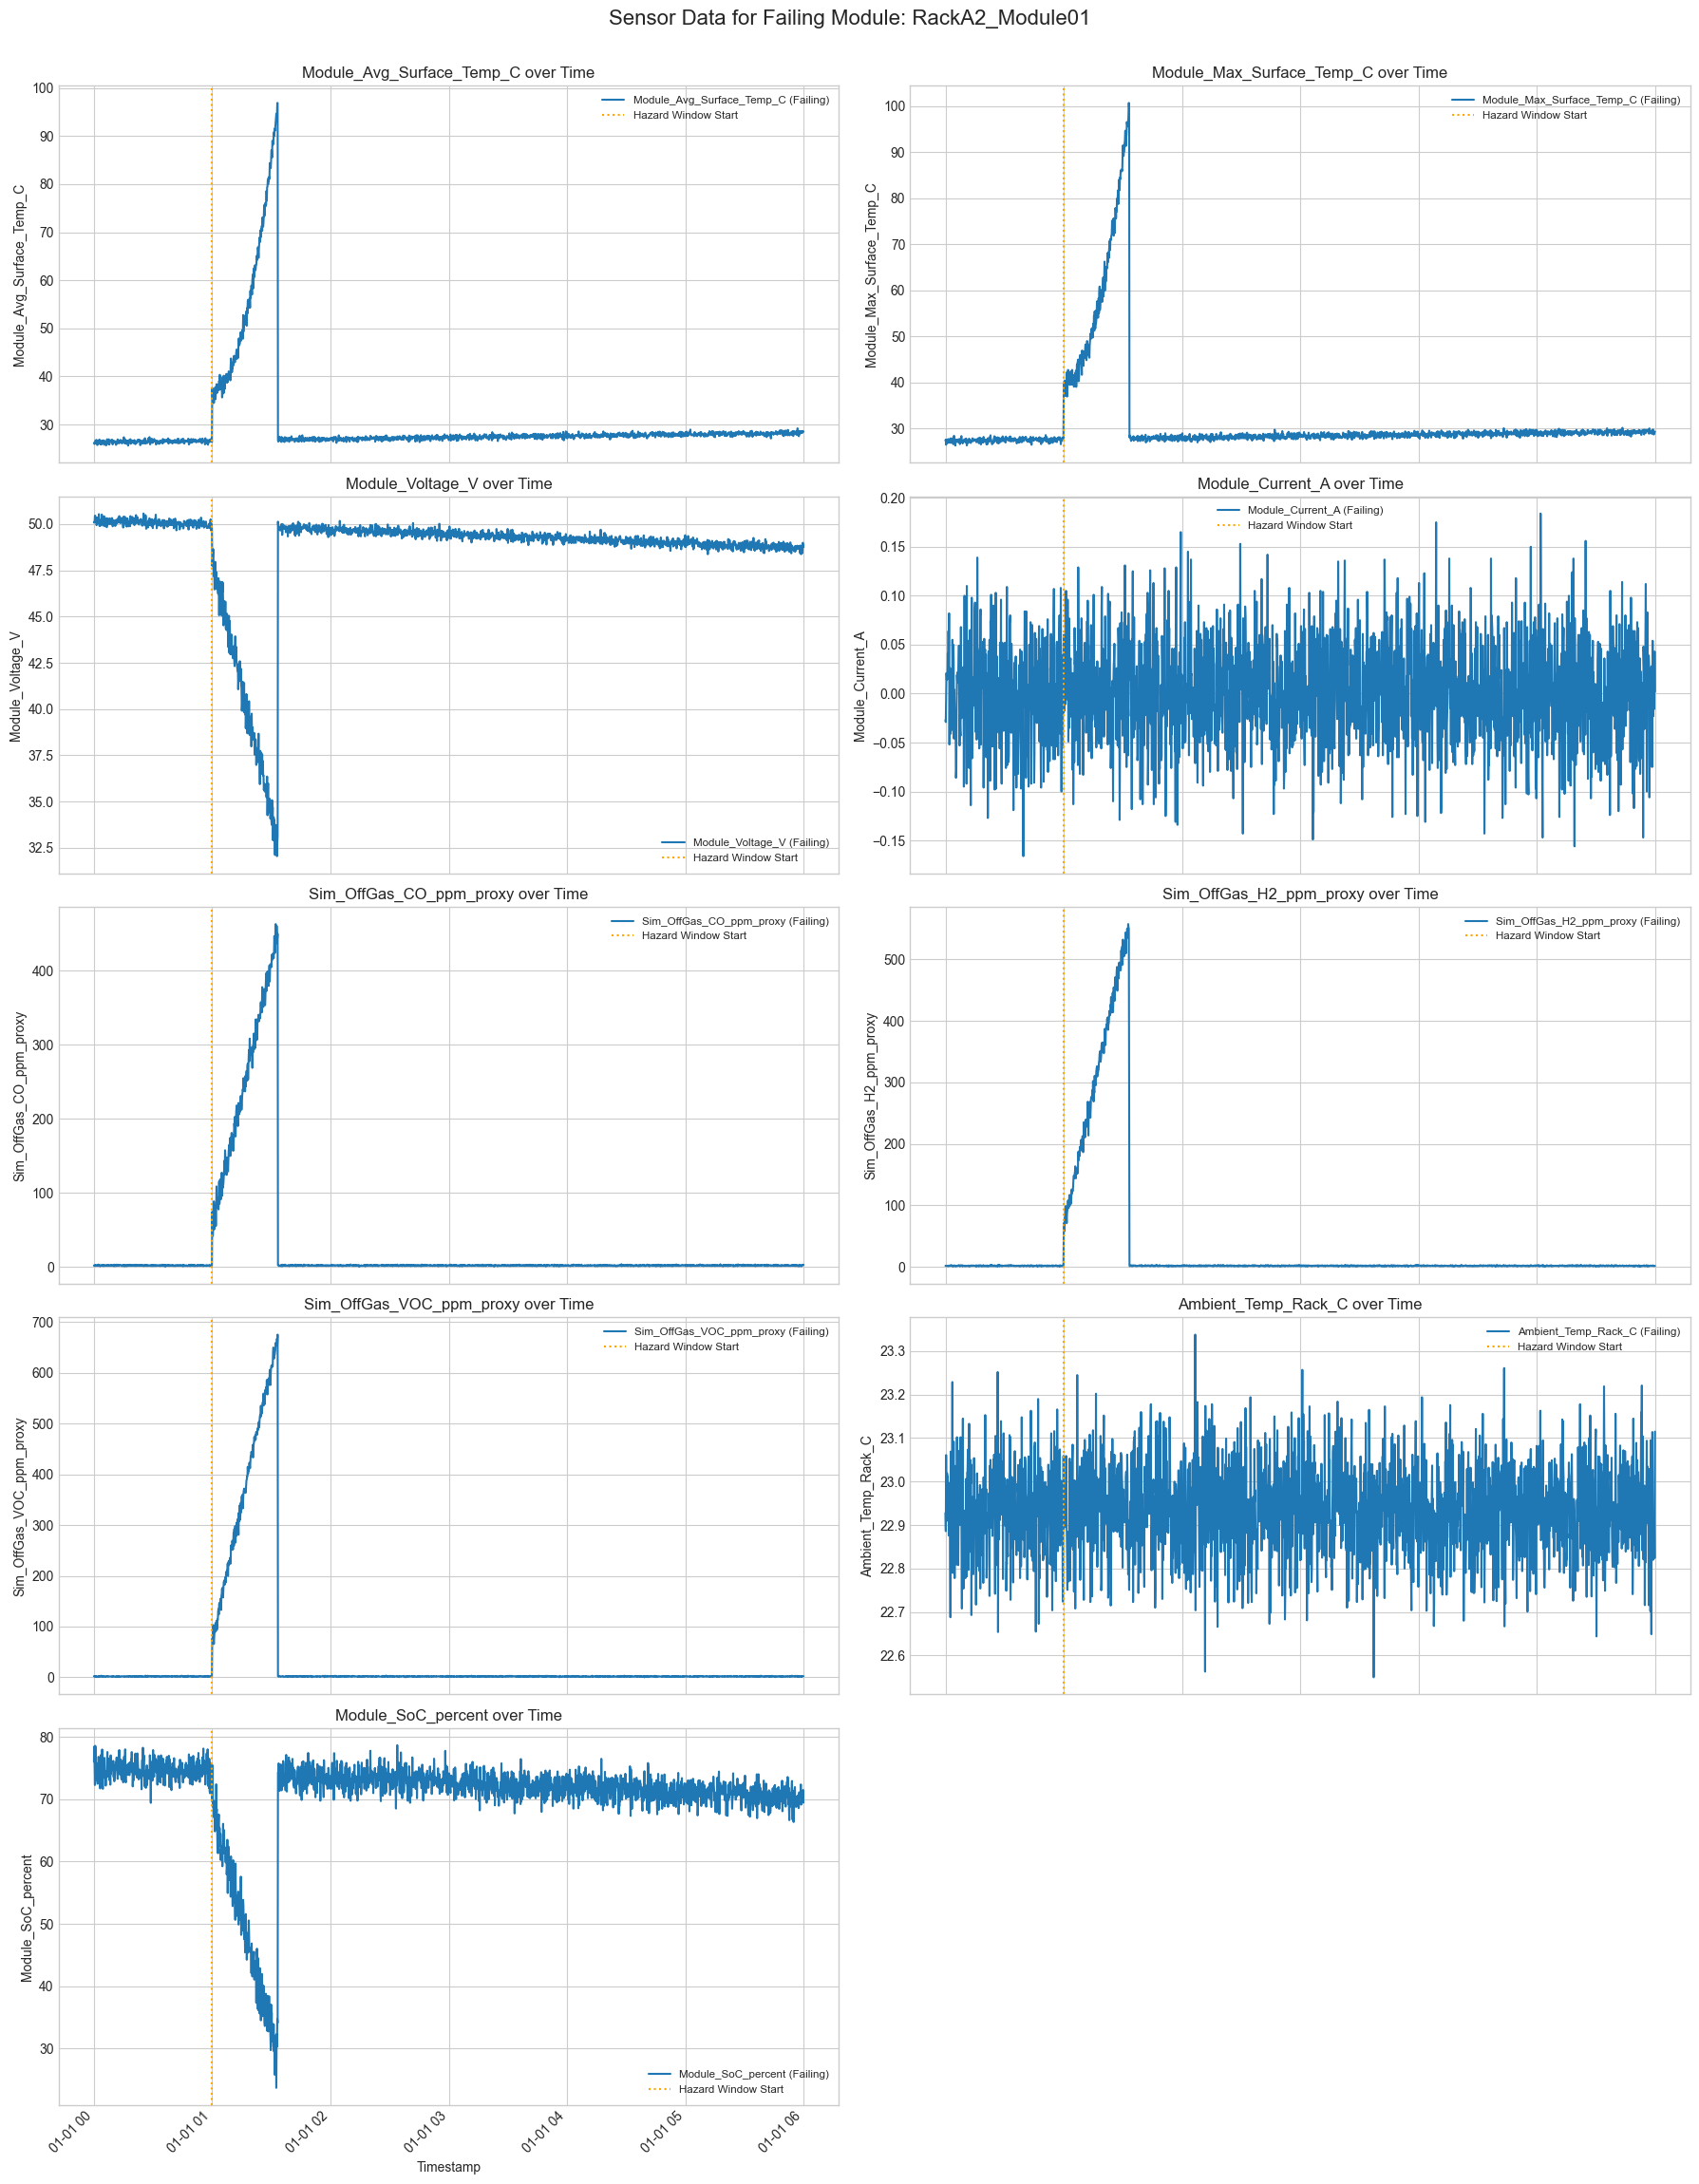

In [15]:
if not df_failing_module.empty:
    print(f"\n--- Plotting sensor data for Failing Module: {FAILING_MODULE_ID} ---")
    
    features_to_plot = [
        'Module_Avg_Surface_Temp_C', 'Module_Max_Surface_Temp_C',
        'Module_Voltage_V', 'Module_Current_A',
        'Sim_OffGas_CO_ppm_proxy', 'Sim_OffGas_H2_ppm_proxy', 'Sim_OffGas_VOC_ppm_proxy',
        'Ambient_Temp_Rack_C', 'Module_SoC_percent'
    ]
    
    # Determine number of rows for subplots
    n_features = len(features_to_plot)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4.5), sharex=True) # Share x-axis for time-series
    axes = axes.flatten() # Flatten to 1D array for easy iteration

    for i, feature in enumerate(features_to_plot):
        ax_current = axes[i]
        if feature in df_failing_module.columns:
            sns.lineplot(x='Timestamp', y=feature, data=df_failing_module, ax=ax_current, label=f'{feature} (Failing)', errorbar=None, legend=False)
            
            # Overlay Hazard Label changes
            # Find points where Hazard_Label changes to 1
            hazard_starts = df_failing_module[
                (df_failing_module['Hazard_Label'] == 1) & (df_failing_module['Hazard_Label'].shift(1) == 0)
            ]['Timestamp']
            
            for t_start in hazard_starts:
                ax_current.axvline(t_start, color='orange', linestyle=':', lw=1.5, label='Hazard Window Start')
            
            ax_current.set_title(f'{feature} over Time')
            ax_current.set_xlabel('Timestamp') # Will only show on bottom plots due to sharex
            ax_current.set_ylabel(feature)
            
            # Create a consolidated legend for each subplot to avoid clutter
            handles, labels = ax_current.get_legend_handles_labels()
            by_label = dict(zip(labels, handles)) # Remove duplicate labels if any
            if by_label: # Only show legend if there are items to show
                 ax_current.legend(by_label.values(), by_label.keys(), loc='best', fontsize='small')

            plt.setp(ax_current.get_xticklabels(), rotation=45, ha="right") # Rotate x-axis labels
        else:
            print(f"Feature '{feature}' not found in failing module data.")
            ax_current.set_visible(False) # Hide subplot if feature not found


    # Remove any unused subplots at the end
    for j in range(i + 1, len(axes)): # i will be the index of the last plotted feature
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f"Sensor Data for Failing Module: {FAILING_MODULE_ID}", y=1.02, fontsize=16)
    plt.show()


---
#### C. Plotting Comparison: Failing vs. Normal Module (for a key feature like Temperature)


--- Comparing Temperature: Failing (RackA2_Module01) vs. Normal (RackA1_Module01) ---


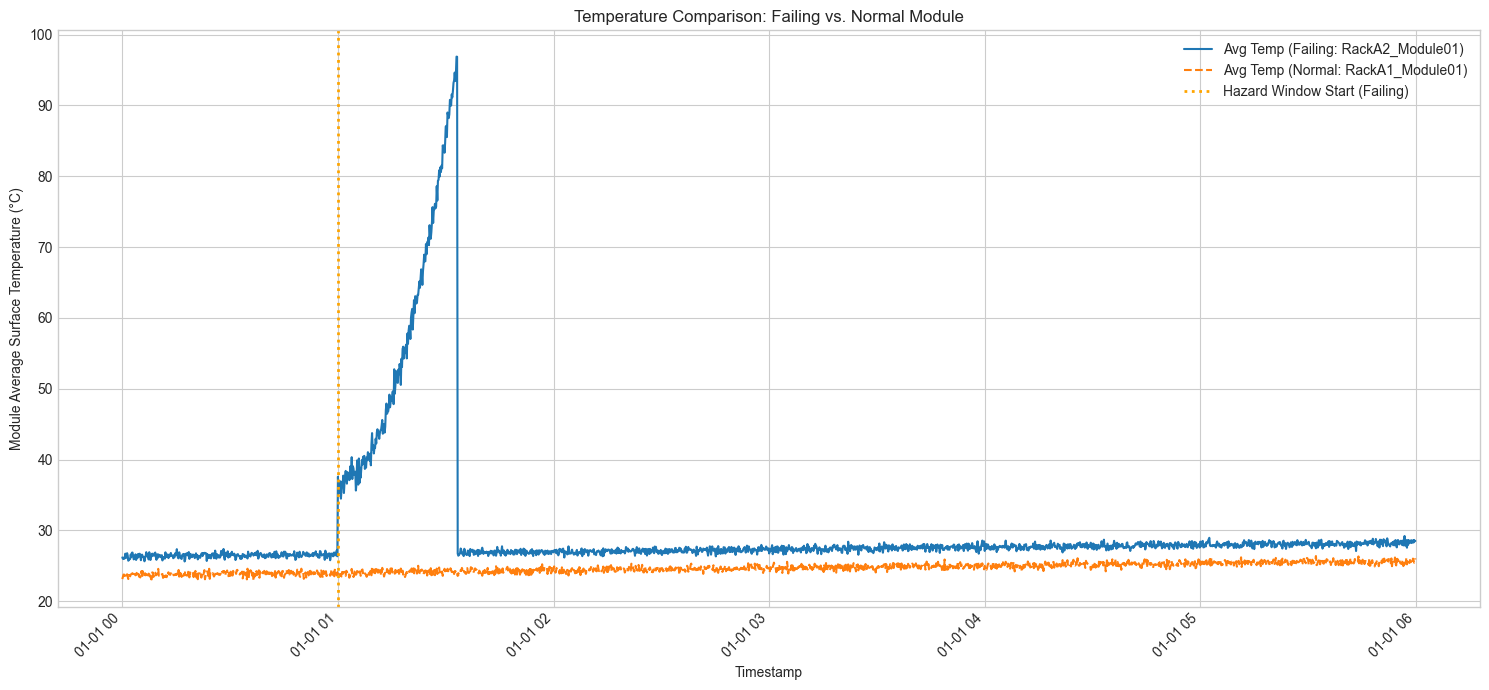

In [16]:
if not df_failing_module.empty and (not df_normal_module.empty if sample_normal_module_id else True): # Proceed if failing exists, normal is optional
    print(f"\n--- Comparing Temperature: Failing ({FAILING_MODULE_ID}) vs. Normal ({sample_normal_module_id if sample_normal_module_id else 'N/A'}) ---")
    
    plt.figure(figsize=(15, 7))
    
    # Plot failing module's average surface temperature
    sns.lineplot(x='Timestamp', y='Module_Avg_Surface_Temp_C', data=df_failing_module, label=f'Avg Temp (Failing: {FAILING_MODULE_ID})', errorbar=None)
    
    # Plot normal module's average surface temperature if available
    if not df_normal_module.empty:
        sns.lineplot(x='Timestamp', y='Module_Avg_Surface_Temp_C', data=df_normal_module, label=f'Avg Temp (Normal: {sample_normal_module_id})', linestyle='--', errorbar=None)
    
    # Highlight hazardous window for the failing module
    if 'Hazard_Label' in df_failing_module.columns:
        hazard_starts_failing = df_failing_module[
            (df_failing_module['Hazard_Label'] == 1) & (df_failing_module['Hazard_Label'].shift(1) == 0)
        ]['Timestamp']
        
        # Add axvline only once for the legend
        added_legend_for_hazard_line = False
        for t_start in hazard_starts_failing:
            if not added_legend_for_hazard_line:
                plt.axvline(t_start, color='orange', linestyle=':', lw=2, label='Hazard Window Start (Failing)')
                added_legend_for_hazard_line = True
            else:
                plt.axvline(t_start, color='orange', linestyle=':', lw=2)


    plt.title('Temperature Comparison: Failing vs. Normal Module')
    plt.xlabel('Timestamp')
    plt.ylabel('Module Average Surface Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    if df_failing_module.empty:
        print(f"No data for failing module {FAILING_MODULE_ID} to plot comparison.")
    if sample_normal_module_id and df_normal_module.empty : # Check if we expected a normal module but didn't get data
        print(f"No data for the sample normal module ({sample_normal_module_id}) to plot comparison.")

**Explanation of Plotting:**

- We select key features related to temperature, electrical state, and gas proxies.

- We create subplots to see multiple sensor readings for the failing module simultaneously.

- sns.lineplot is used to plot each feature against Timestamp.

- Crucially, we try to overlay where the Hazard_Label is 1. This helps us visually verify if the labeled "pre-fire" window corresponds to anomalous sensor behavior. The provided code marks the start of such windows.

- We then plot a direct comparison of a key feature (like Module_Avg_Surface_Temp_C) between the failing module and our sample normal module.

**What to look for in these plots:**

**Failing Module Behavior:**

- Does temperature rise sharply before or during the Hazard_Label == 1 window?

- Do voltage or current show unusual behavior (drops, spikes)?

- Do the simulated gas proxies (Sim_OffGas_CO_ppm_proxy, etc.) increase as expected before critical temperature rise? Are they good early indicators?

- Does the Module_SoC_percent behave as expected during the fault (e.g., rapid discharge if it's an internal short)?

- Normal Module Behavior: The plots for the normal module should show typical fluctuations without the dramatic changes seen in the failing one.

- Comparison: The difference between the failing and normal module should be clear, especially for temperature and gas proxies, as the fault progresses.

- Labeling Sanity Check: Does the Hazard_Label == 1 window align with the onset of these anomalous behaviors? Is the PREDICTION_WINDOW_SECONDS appropriate?

- Noise and Outliers: Can you visually spot the noise we added (jagged lines)? Can you see any occasional spikes that might be outliers?

---
#### Step 5: Data Quality Deep Dive - Missing Values & Outliers
- While df.isnull().sum() gave us counts, visualizing can sometimes be more insightful, especially for time-series. For outliers, boxplots are useful.


--- Analyzing Missing Values Further ---

--- Analyzing Outliers with Boxplots (Example: Temperature) ---


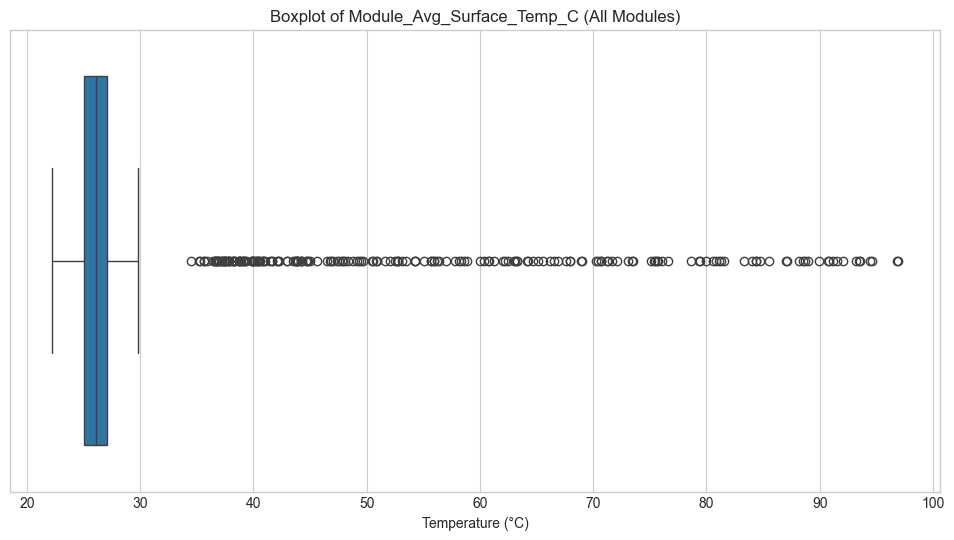

<Figure size 1200x600 with 0 Axes>

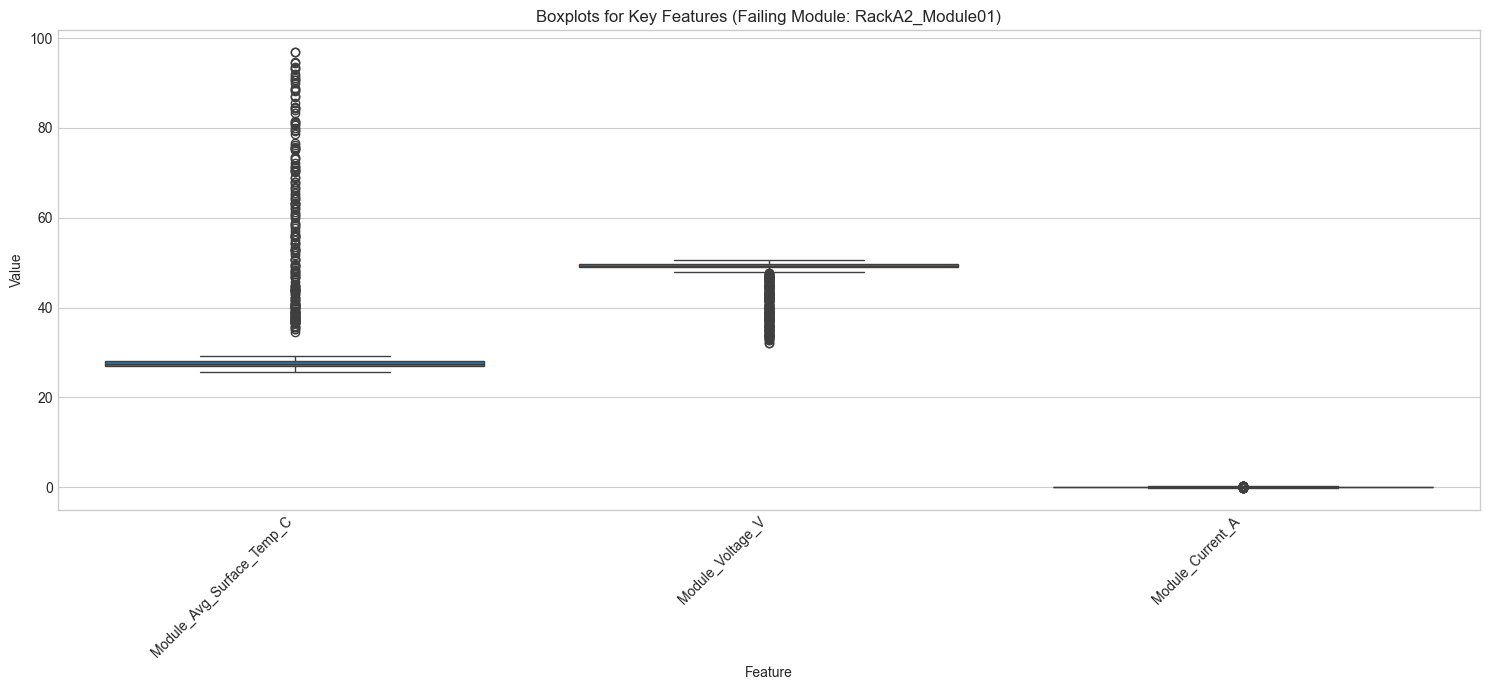

In [17]:
if not df.empty:
    print("\n--- Analyzing Missing Values Further ---")
    # The .isnull().sum() from Step 2 is often sufficient for initial check.
    # A heatmap can be useful for datasets with many columns and complex missingness patterns:
    # plt.figure(figsize=(15, 8))
    # sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    # plt.title('Missing Data Heatmap (Yellow indicates missing)')
    # plt.show()
    # For now, focusing on counts.

    print("\n--- Analyzing Outliers with Boxplots (Example: Temperature) ---")
    # We'll look at temperature for all modules together to see overall distribution and outliers
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Module_Avg_Surface_Temp_C']) # Using x for horizontal boxplot, or y for vertical
    plt.title('Boxplot of Module_Avg_Surface_Temp_C (All Modules)')
    plt.xlabel('Temperature (°C)')
    plt.show()

    # You can also do this per module, but it might be too many plots.
    # Example for the failing module:
    if not df_failing_module.empty:
        # df_failing_module has Timestamp as index. For boxplot, we usually don't need time.
        # Reset index temporarily if needed for melting or specific seaborn functions, or select columns directly.
        df_failing_module_for_boxplot = df_failing_module.reset_index() # Get Timestamp back as column if needed by melt
        
        plt.figure(figsize=(12, 6))
        # Select a few key numerical features for boxplotting for the failing module
        features_for_boxplot_failing = ['Module_Avg_Surface_Temp_C', 'Module_Voltage_V', 'Module_Current_A']
        
        # Ensure features exist in the dataframe
        plotable_features_failing = [f for f in features_for_boxplot_failing if f in df_failing_module_for_boxplot.columns]

        if plotable_features_failing:
            # Melt the dataframe to have a long format suitable for boxplot with multiple features using seaborn
            df_failing_melted = df_failing_module_for_boxplot.melt(
                id_vars=['Timestamp', 'Module_ID'], # Keep these as identifiers
                value_vars=plotable_features_failing, 
                var_name='Feature', 
                value_name='Value'
            )
            
            if not df_failing_melted.empty:
                plt.figure(figsize=(15,7))
                sns.boxplot(x='Feature', y='Value', data=df_failing_melted)
                plt.title(f'Boxplots for Key Features (Failing Module: {FAILING_MODULE_ID})')
                plt.xlabel('Feature')
                plt.ylabel('Value')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            else:
                print(f"No data to melt for failing module {FAILING_MODULE_ID} boxplot (features might be missing or all NaN).")
        else:
            print(f"None of the selected features for boxplotting are available for failing module {FAILING_MODULE_ID}.")


#### Explanation:

- A heatmap of missing values (sns.heatmap(df.isnull(), ...) can be very illustrative for datasets with many columns, showing patterns of missingness. For our current data, where missingness is random and sparse per column, isnull().sum() is quite effective.

- sns.boxplot() is excellent for visualizing the distribution of a feature and identifying outliers (points beyond the "whiskers" of the plot).

- The first boxplot shows the overall distribution of Module_Avg_Surface_Temp_C across all readings for all modules in the dataset. This will likely be dominated by normal operating temperatures, but fault-induced high temperatures might appear as outliers.

- The second set of boxplots (if the failing module data is present) focuses on a few key features just for the failing module. This can highlight if the fault condition itself produces values that are outliers compared to its own typical operational range before the fault.

#### What to look for:

#### Boxplots:

- The main "box" shows the interquartile range (IQR: 25th to 75th percentile).

- The line inside the box is the median (50th percentile).

- "Whiskers" typically extend to 1.5 times the IQR from the box.

- Points beyond the whiskers are potential outliers. Do these correspond to our intentionally added outliers or to genuine extreme conditions during a fault?

#### Step 6: Preliminary Thoughts & Next Steps after EDA
- Based on this initial EDA, you should have a much better feel for your synthetic data.

##### Key questions to reflect on:

- Realism: Does the data (especially the failure progression) seem plausible enough for this stage of the project?

- Predictive Signal: Are there clear visual differences in sensor readings for the failing module during the Hazard_Label == 1 window compared to its own normal operation or other normal modules?

- Data Quality Impact: How severe do the missing values, noise, and outliers appear? Will they require significant effort in the preprocessing phase? (The answer should be yes, as we designed it that way!)

- Feature Importance (Initial Gut Feel): Which sensor readings seem to change most distinctively before a failure? (e.g., temperature, gas proxies).

- Labeling Adequacy: Does the PREDICTION_WINDOW_SECONDS seem reasonable? Too long? Too short?

---
#### Next Phase: Phase 3 - Data Preprocessing and Feature Engineering.
- The insights from this EDA will directly inform what we do next:

- Handling Missing Values: Imputation strategies (e.g., forward-fill, mean/median imputation).

- Outlier Treatment: Deciding whether to cap, remove, or transform outliers.

- Noise Reduction: Applying techniques like rolling averages/medians.

- Feature Scaling: Standardizing or normalizing features for ML models.

- Feature Engineering: Potentially creating new features (e.g., Delta_T_Rate if we didn't already have a good one, or interaction terms), though our simulator already creates many useful ones.

---
Now that we have the dummy data with both 'Normal' (0) and 'Hazardous' (1) labels, let's dive into what to look for in the EDA steps, particularly Step 4 and Step 5, and then discuss class imbalance in detail.

---

**Understanding EDA Step 4: Time-Series Visualization**

The goal here is to *visually confirm* that the data for the faulty module (`RackA2_Module01`) looks different during the hazardous period compared to its own normal operation or compared to other healthy modules.

* **A. Plotting Key Sensor Data for the Failing Module (`RackA2_Module01`)**
    * **What the Code Does:** This part generates multiple subplots, each showing one sensor reading (like temperature, voltage, etc.) for *only* `RackA2_Module01` over the entire 6-hour simulation time. It also marks the start of the hazardous window (where `Hazard_Label` should be 1, roughly 1.00h to 1.56h in the dummy data).
    * **What to Look For (Specifically in the 1.00h - 1.56h window):**
        * **Temperature Plots (`Module_Avg/Max_Surface_Temp_C`):** You should see a clear and significant *increase* in temperature starting around the 1-hour mark and continuing through the window. The dummy data adds `(10 + 60 * progression**2)`, so the temperature should rise quite sharply compared to the baseline ~25°C.
        * **Voltage Plot (`Module_Voltage_V`):** You should see a distinct *drop* in voltage during this window compared to the baseline ~51V. The dummy data subtracts `(2 + 15 * progression)`.
        * **SoC Plot (`Module_SoC_percent`):** You should see a noticeable *decrease* in the State of Charge during this window, faster than the slight downward drift seen in normal operation. The dummy data subtracts `(5 + 40 * progression)`.
        * **Gas Proxy Plots (`Sim_OffGas...`):** These should show a very large *increase* during the hazardous window compared to their baseline near ~2 ppm. The dummy data adds hundreds of ppm, increasing with `progression`.
        * **Current Plot (`Module_Current_A`):** In the *dummy data*, this was just set to random noise around 0. You likely won't see a significant change here unless you modify the dummy generator to simulate high current during the fault.
        * **Hazard Window Line:** The vertical orange line should appear at the start of these anomalies (around 1 hour). The anomalies should persist until around the 1.56-hour mark.
    * **Why it Matters:** This visually confirms that the hazardous state (`Hazard_Label == 1`) corresponds to measurable, anomalous sensor readings in our dataset. It gives us confidence that a machine learning model *might* be able to learn these patterns. If the plots showed no difference during the hazardous window, our dummy data generation would be flawed.

* **B. Plotting Comparison: Failing vs. Normal Module (Temperature)**
    * **What the Code Does:** This plots the average temperature of the failing module (`RackA2_Module01`) and a sample normal module (e.g., `RackA1_Module01`) on the *same graph*.
    * **What to Look For:** You should see the two temperature lines tracking each other relatively closely for the first hour. Then, around the 1-hour mark, the line for `RackA2_Module01` should dramatically diverge upwards, while the line for the normal module continues its typical, much lower fluctuation. The orange line marks the start of this divergence for the failing module.
    * **Why it Matters:** This directly highlights the difference the model needs to learn – distinguishing the faulty module's thermal signature from a healthy one operating under similar ambient conditions.

---

**Understanding EDA Step 5: Data Quality Deep Dive (Boxplots)**

The goal here is to understand the distribution of values for each sensor and identify potential outliers, both across all data and specifically for the failing module.

* **A. Boxplot of Temperature (All Modules)**
    * **What the Code Does:** Creates a boxplot showing the distribution of `Module_Avg_Surface_Temp_C` for *all 138,240 data points*.
    * **What to Look For:**
        * The main "box" will represent the typical temperature range during normal operation (e.g., 20-35°C).
        * You should see many points plotted as dots far above the upper "whisker". These are outliers.
        * Most of these high outliers will correspond to the high temperatures reached by `RackA2_Module01` during its hazardous/fault phase.
        * There might be a few other outliers due to the random `introduce_outlier_randomly` function applied to other modules.
    * **Why it Matters:** This confirms that the fault condition creates values that are statistically outliers compared to the overall dataset. It also shows the presence of other random outliers that our preprocessing will need to handle.

* **B. Boxplots for Key Features (Failing Module Only)**
    * **What the Code Does:** Creates separate boxplots for Temperature, Voltage, and Current, using *only* the data points for `RackA2_Module01`.
    * **What to Look For:**
        * **Temperature:** The box itself might be wider or higher than for a normal module, and the upper whisker will likely extend much further. The highest temperatures during the fault will probably still show as outliers *even relative to this module's own data*, because it spends most of its time in the normal range.
        * **Voltage/SoC:** Similarly, the lower whisker might be extended downwards, and the lowest values during the fault might appear as outliers below the lower whisker.
    * **Why it Matters:** This helps understand the range of values *within* the faulty module's lifecycle. It shows how distinct the hazardous period values are compared to its normal operation.

---

**Understanding Class Imbalance**

* **Is the data imbalanced?**
    * **Yes, absolutely.** Your Step 3 output confirms this:
        ```
        Hazard_Label
        0    138040 (99.855%)
        1       200 ( 0.145%)
        ```
    * The "Normal" class (0) vastly outnumbers the "Hazardous" class (1).

* **Why is it imbalanced?**
    * This is **inherent to the problem domain**. Battery thermal runaway events (and the hazardous states preceding them) are, thankfully, **rare** compared to the vast amount of time batteries operate normally.
    * Our simulation reflects this reality. Even though we simulated only 6 hours, the hazardous window for the single failing module is only about 33 minutes (200 steps * 10s/step = 2000s), while the total time simulated across all modules is 6 hours * 64 modules = 384 module-hours.

* **Why is imbalance a problem for Machine Learning?**
    * **Default Model Behavior:** Most standard ML algorithms (like Logistic Regression, basic Neural Networks, etc.) aim to minimize overall error or maximize overall accuracy across *all* data points.
    * **Misleading Accuracy:** With 99.85% normal data, a lazy model could achieve 99.85% accuracy by simply *always* predicting "Normal" (label 0). It completely ignores the rare, but critical, hazardous class.
    * **Ignoring the Minority Class:** Because the hazardous class contributes so little to the overall error calculation, the model might not learn its patterns effectively. It prioritizes getting the majority class right.
    * **Poor Real-World Performance:** Such a model would be useless in practice because it would fail to predict the actual fire hazards (high **False Negatives**), which is the entire point of the system!
    * **Need for Better Metrics:** Simple accuracy is not a good metric here. We need metrics that focus on the positive (hazardous) class performance, such as:
        * **Recall (Sensitivity):** Out of all *actual* hazardous events, how many did the model correctly identify? (We want this to be very high, like the 92% mentioned in your project description). `Recall = True Positives / (True Positives + False Negatives)`
        * **Precision:** Out of all events the model *predicted* as hazardous, how many were *actually* hazardous? (We want this to be reasonably high to avoid too many false alarms, like the 89% mentioned). `Precision = True Positives / (True Positives + False Positives)`
        * **F1-Score:** The harmonic mean of Precision and Recall, providing a single balanced measure.
        * **Precision-Recall Curve (PR Curve) & AUC-PR:** Visualizes the trade-off between precision and recall; the Area Under the Curve (AUC-PR) summarizes this. Better for imbalanced data than the standard ROC curve.

* **What to do about Imbalance? (Strategies for Phase 4 - Modeling)**
    * **1. Data-Level Approaches (Resampling):**
        * **Oversampling:** Create copies of the minority class (label 1) examples or generate synthetic minority examples (like using **SMOTE** - Synthetic Minority Over-sampling Technique) to balance the dataset *before* training.
        * **Undersampling:** Randomly remove examples from the majority class (label 0). This is faster but risks losing valuable information about normal behavior.
        * **Combination/Hybrid:** Often, combining oversampling the minority and undersampling the majority works well.
    * **2. Algorithm-Level Approaches (Cost-Sensitive Learning):**
        * **Class Weighting:** Modify the learning algorithm's objective function to penalize misclassifications of the minority class more heavily than misclassifications of the majority class. Many algorithms (Logistic Regression, SVMs, Random Forests, XGBoost, LightGBM) support a `class_weight` or `scale_pos_weight` parameter. For example, if class 1 is 0.14% of the data, you might give it a weight roughly 1/0.0014 ≈ 700 times higher than class 0.
    * **3. Evaluation Metrics:** As mentioned above, use metrics like Recall, Precision, F1-score, and AUC-PR instead of just Accuracy.

* **Do we need to increase the number of hazardous rows (e.g., from 200)?**
    * **Not necessarily required right now.** While 200 rows is a small absolute number compared to 138k, the *percentage* (0.14%) represents a realistic, highly imbalanced scenario.
    * The techniques above (especially Class Weighting and SMOTE) are specifically designed to work even with such low numbers of minority samples. Trying to handle the imbalance using these methods is standard practice and a key part of building a robust model for rare event prediction.
    * Artificially generating *many* more hazardous rows in the dummy data might make the initial modeling seem easier, but it wouldn't reflect the real-world data challenge as accurately.
    * **Recommendation:** Let's proceed with the current dataset (138040 vs 200). It forces us to correctly apply imbalance handling techniques in the modeling phase, which is an important learning objective based on your project description and likely interview questions. We can always generate more data later if we find the model *really* struggles even with these techniques.

---

**Summary & Next Step:**

The key takeaway is the confirmation of significant class imbalance, which dictates our strategy for model training and evaluation later.